# Contents

## 0) Import Modules and Data
## 1) My Questions
## 2) Prepare for Data Exploration
## 3) Graphical Exploration
### _-- A) Colored Heatmap_
### _-- B) Scatterplot_
### _-- C) Pair Plots_
### _-- D) Categorical Plot_
## 4) Export Dataset
## 5) Hypotheses

# 0) Import Modules and Data

In [2]:
# Import pandas and graphical modules
 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline

In [3]:
# Import df

df=pd.read_csv('/Users/sjpeterson76/Desktop/CareerFoundry/Data Immersion/Achievement 6/Seismic Data Project/02 Data/Prepared Data/2021-07-16--16:43 - consistent.csv',
              index_col=0)

# 1) My Questions
- Can I identify any geologic patterns? (mountains, etc?)

# 2) Prepare for Data Exploration

In [4]:
df.columns # Get column names

Index(['date', 'time', 'lat', 'long', 'type', 'depth', 'mag', 'mag_type',
       'rms', 'id', 'source', 'status'],
      dtype='object')

In [5]:
sub=df[['lat', # Remove variables in time-series & id formats
       'long', 
       'type', 
       'depth', 
       'mag', 
       'mag_type',
       'rms', 
       'source', 
       'status']]

# 3) Graphical Exploration

## _-- A) Colored Heatmap_

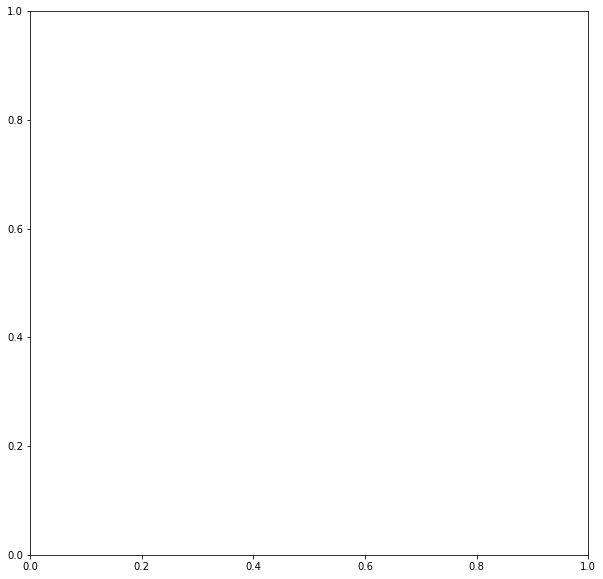

In [5]:
f,ax=plt.subplots(figsize=(10,10)) # Create an empty output

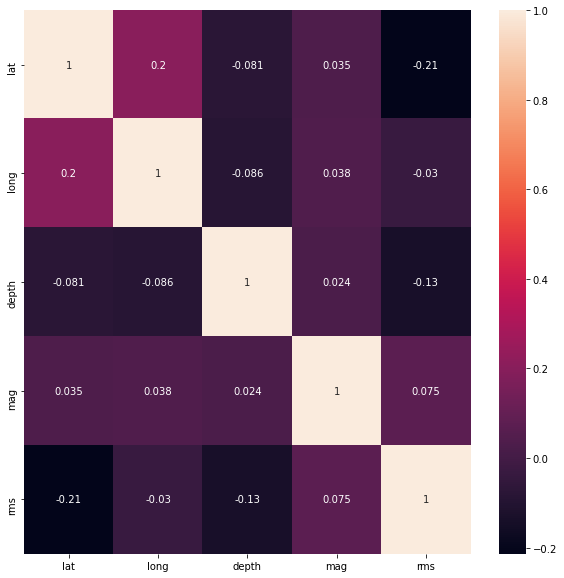

In [6]:
# Apply heatmap

corr=sns.heatmap(sub.corr(),annot=True,ax=ax)
corr.figure

Notes
- the darkest cells - weak & negative relationships ('depth' vs 'rms'), the purple cells - weak positve relationships ('long' vs 'lat'), light cells - strong relationship ('rms' vs 'rms')
- all of the variables have a weak relationship (except when comparing each variable to itself)

In [7]:
# Export Heatmap

corr.figure.savefig('/Users/sjpeterson76/Desktop/CareerFoundry/Data Immersion/Achievement 6/Seismic Data Project/04 Analysis/Visuals/heatmap.png')

## _-- B) Scatterplot_

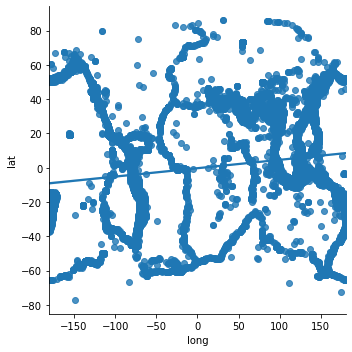

In [8]:
# Plot variables w/ strongest correlation: 'lat' & 'long'

lat_vs_long=sns.lmplot(x='long',y='lat',data=sub)
lat_vs_long

![Earth Latitude vs Longitude](20f2f-longitude-and-latitude.jpeg)

Notes
- I did not expect to find any correlation between these 2 variables. However, it closely resembles the outlines of the earth's continents. It looks like a map!
- Does not have a serious linear correlation, but in my novice opinion it seems like there are patterns.

In [9]:
# Export figure

lat_vs_long.savefig('/Users/sjpeterson76/Desktop/CareerFoundry/Data Immersion/Achievement 6/Seismic Data Project/04 Analysis/Visuals/lat_vs_long_scatterplot.png')

## _-- C) Pair Plots_

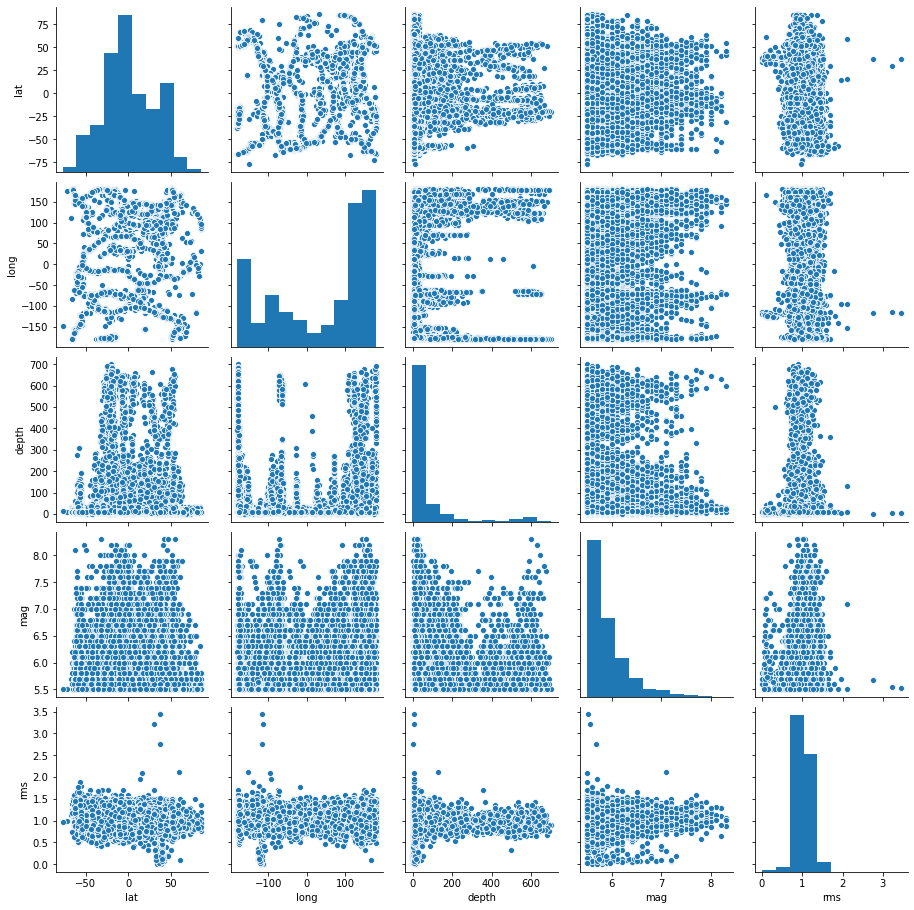

In [10]:
g=sns.pairplot(sub) # Create pair plot

Notes
- To me it looks like there may be some strong correlations underlying the seemingly uncorrelated scatterplots, mainly with 'lat' & 'long' variables and depth. I may find out more when examining the distributions.
- I would also note that 'rms' looks pretty similar across all variables. Investigate further
- You can also gather some insights with the histograms:
 - 'rms' favors 1
 - 'mag' & 'depth' have a right-skew
 - 'lat' is close to normal
 - 'long' is parabolic

In [11]:
# Export pairplot

g.savefig('/Users/sjpeterson76/Desktop/CareerFoundry/Data Immersion/Achievement 6/Seismic Data Project/04 Analysis/Visuals/lat_long_pairplot.png')

## _-- D) Categorical Plot_

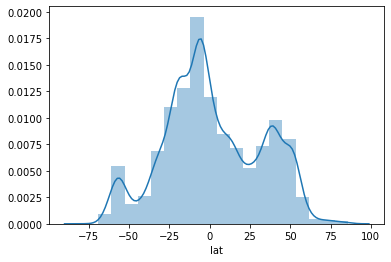

In [12]:
# Use histogram to break data down categories

lat_vs_long_histogram=sns.distplot(sub['lat'], bins=20)
lat_vs_long_histogram

In [13]:
# Export histogram

lat_vs_long_histogram.figure.savefig('/Users/sjpeterson76/Desktop/CareerFoundry/Data Immersion/Achievement 6/Seismic Data Project/04 Analysis/Visuals/lat_long_histo.png')

In [14]:
df.loc[df['lat'] < -50, 'reg_flag']='reg_1'

In [15]:
df.loc[(df['lat'] >= -50) & (df['lat'] < 25), 'reg_flag']='reg_2'

In [16]:
df.loc[df['lat'] >= 25, 'reg_flag']='reg_3'

In [17]:
df['reg_flag'].value_counts() # Check variable

reg_2    16110
reg_3     5946
reg_1     1343
Name: reg_flag, dtype: int64

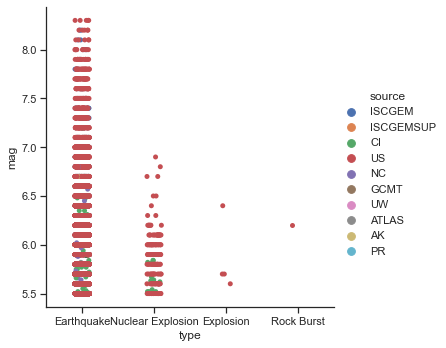

In [6]:
# Create catplot

sns.set(style='ticks')
g=sns.catplot(x='type',
              y='mag',
              hue='source', 
              data=sub)

In [7]:
# Export catplot

g.savefig('/Users/sjpeterson76/Desktop/CareerFoundry/Data Immersion/Achievement 6/Seismic Data Project/04 Analysis/Visuals')

# 4) Export Dataset

In [ ]:
df.to_csv('/Users/sjpeterson76/Desktop/CareerFoundry/Data Immersion/Achievement 6/Seismic Data Project/02 Data/Prepared Data/reg_flag_derivation.csv')

# 5) Hypotheses

- Although many of these variables appear to have no linear relationship, I'd bet that I can find more than is suggested by the evaluations in this exercise.
- I think that with further examination, I could find patterns in the scatterplot that match the earth's map.
- There may also be earthquake hotspots - places where seismic activity happens more often and where you could predict more seismic activity in the future.